In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("../../data/fish.csv")

##### Explore the data

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Length1', ylabel='Weight'>,
        <Axes: xlabel='Length2', ylabel='Weight'>,
        <Axes: xlabel='Length3', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='Width', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Length1'>,
        <Axes: xlabel='Length1', ylabel='Length1'>,
        <Axes: xlabel='Length2', ylabel='Length1'>,
        <Axes: xlabel='Length3', ylabel='Length1'>,
        <Axes: xlabel='Height', ylabel='Length1'>,
        <Axes: xlabel='Width', ylabel='Length1'>],
       [<Axes: xlabel='Weight', ylabel='Length2'>,
        <Axes: xlabel='Length1', ylabel='Length2'>,
        <Axes: xlabel='Length2', ylabel='Length2'>,
        <Axes: xlabel='Length3', ylabel='Length2'>,
        <Axes: xlabel='Height', ylabel='Length2'>,
        <Axes: xlabel='Width', ylabel='Length2'>],
       [<Axes: xlabel='Weight', ylabel='Length3'>,
        <Axes: xlabel='Lengt

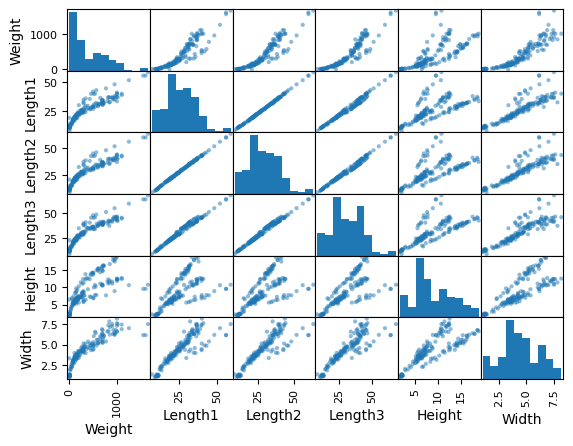

In [56]:
scatter_matrix(df)

#### Note. Quadratic terms in all the variables might give a better model

### Prepare the data

In [57]:
X = df.drop('Weight', axis='columns')
x = pd.get_dummies(X)
y = df.Weight

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

#### Build a model and find R^2 and RMSE

In [58]:
from sklearn.metrics import root_mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

print("Slope: ", model.coef_)
print("Intercept: ", model.intercept_)
print("R squared: ", model.score(X_train, y_train))

y_hat = model.predict(X_test)
print("RMSE: ", root_mean_squared_error(y_test, y_hat))

Slope:  [ -77.54961986   79.82351542   32.07795278   -7.39940573    6.27375101
  -52.45900441  101.23781327   34.41437005 -374.32402364   -7.14175994
  307.1979751    -8.92537042]
Intercept:  -791.7343125834225
R squared:  0.9406750115439331
RMSE:  103.43601101631997


# Iterate and include quadratic terms

#### Add quadratic terms for all the numeric variables in the fish example.
##### For example X['L1squared'] = np.square(df.Length1)

In [59]:
X['L1squared'] = np.square(df.Length1)
X['L2squared'] = np.square(df.Length2)
X['L3squared'] = np.square(df.Length3)
X['Hsquared'] = np.square(df.Height)
X['Wsquared'] = np.square(df.Width)

In [60]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

print('R squared:', model.score(X_train, y_train))
print('RMSE', mean_squared_error(y_test, yhat))

R squared: 0.9406750115439331
RMSE 10699.008374968265


#### Note
+ R^2 has gone up. This is good but you need to be careful with this, as in general it can go up when more variables are added.
+ RMSE has gone down. This is the important measure. Tells us the model is better on previously unseen data.